In [23]:
import pandas as pd
import matplotlib.pyplot as plt
#import plotly.express as px

# PDの日本語フォントをサポート
plt.rcParams['font.family'] = 'Gothic'

# Macの日本語フォントをサポート
plt.rcParams['font.family'] = 'Hiragino Sans'

# CSVファイルからデータセットを読み込む
csv_file_path = 'emdat.csv'  # CSVファイルのパスに置き換えてください
emdat = pd.read_csv(csv_file_path)

# データセットの最初の数行を表示
emdat.head()

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


In [24]:
# 災害タイプ別死亡者の合計を計算し、ランキングを作成
death_ranking = emdat.groupby('Disaster Type')['Total Deaths'].sum().sort_values(ascending=False)
print("災害タイプ別死亡者ランキングトップ10:")
#上位10件を表示
print(death_ranking.head(10))

災害タイプ別死亡者ランキングトップ10:
Disaster Type
Drought                11734272.0
Epidemic                9623111.0
Flood                   7016630.0
Earthquake              2409975.0
Storm                   1421623.0
Extreme temperature      306324.0
Volcanic activity         86945.0
Mass movement (wet)       69393.0
Wildfire                   5349.0
Mass movement (dry)        4502.0
Name: Total Deaths, dtype: float64


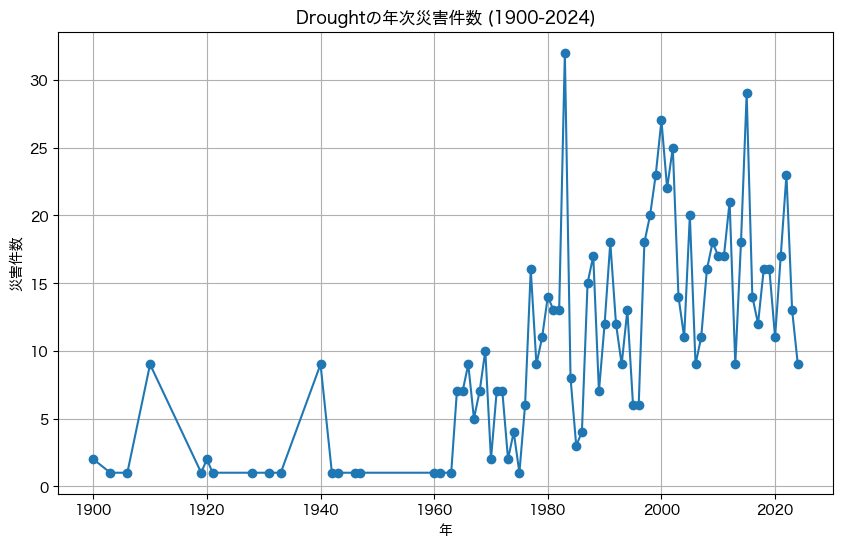

In [25]:
def plot_disaster_trends(data, disaster_type, start_year, end_year):
    # 指定された災害タイプと期間でデータをフィルタリング
    filtered_data = data[(data['Disaster Type'] == disaster_type) & 
                         (data['Year'] >= start_year) & 
                         (data['Year'] <= end_year)]
    
    # 年ごとの災害件数を集計
    disaster_counts = filtered_data.groupby('Year').size()
    
    # プロットの作成
    plt.figure(figsize=(10, 6))
    plt.plot(disaster_counts.index, disaster_counts.values, marker='o')
    plt.title(f'{disaster_type}の年次災害件数 ({start_year}-{end_year})')
    plt.xlabel('年')
    plt.ylabel('災害件数')
    plt.grid()
    plt.show()

# Add a 'Year' column from 'Start Year' then call the plotting function
plot_disaster_trends(emdat.assign(Year=emdat['Start Year']), 'Drought', 1900, 2024)

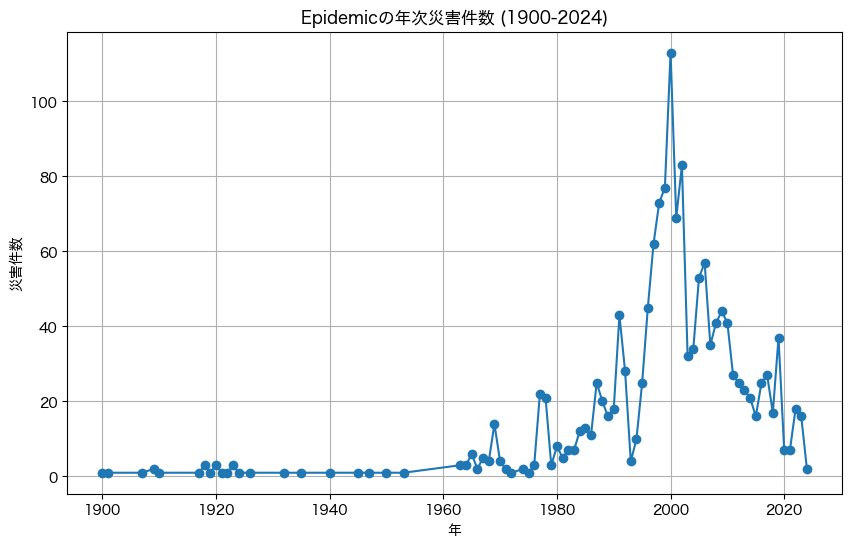

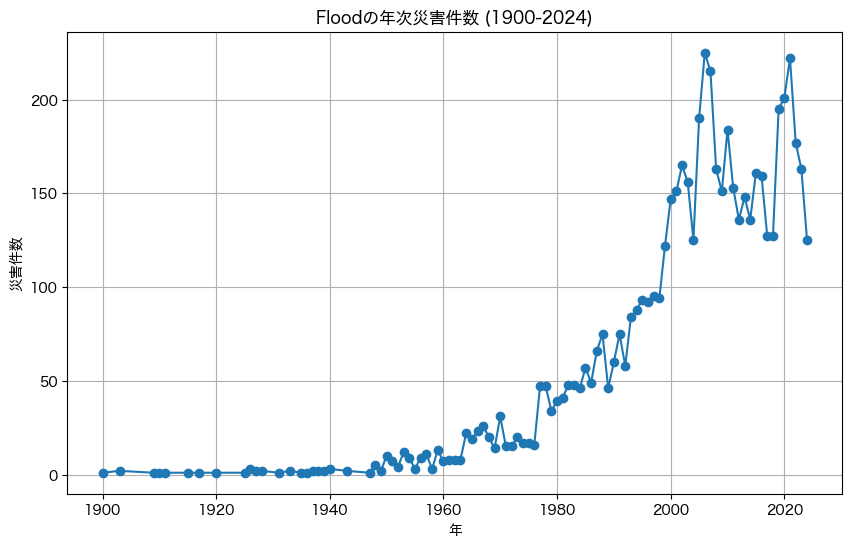

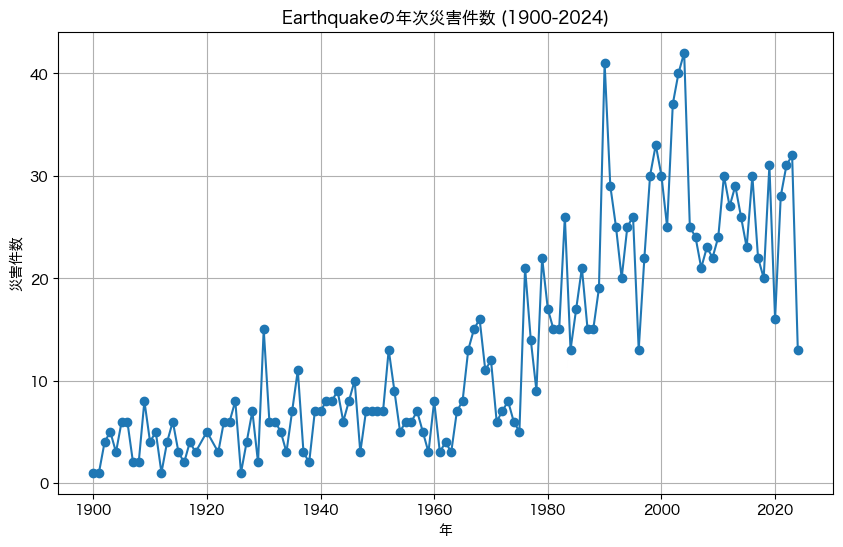

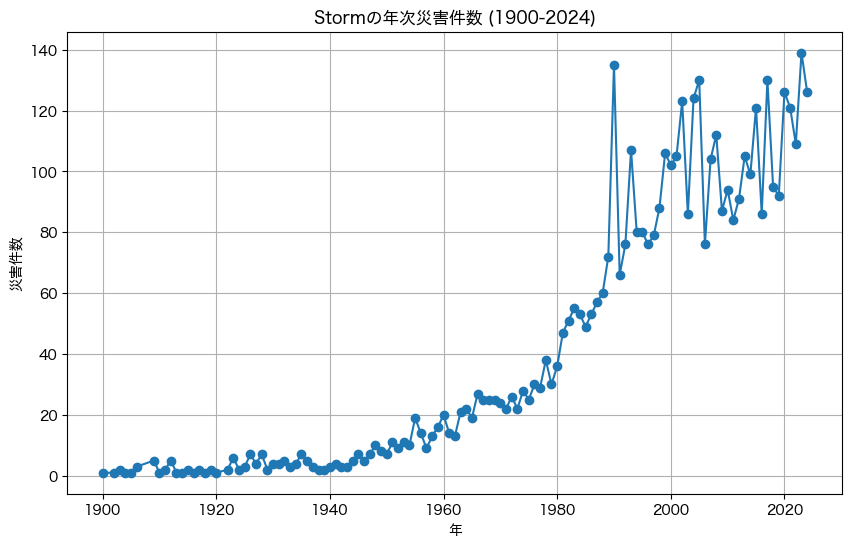

In [26]:
dlist=["Epidemic","Flood","Earthquake","Storm"]
for disaster in dlist:
    plot_disaster_trends(emdat.assign(Year=emdat['Start Year']), disaster, 1900, 2024)